### Initialisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

from generate_data import dataGenerator

from DC_algorithm import *
from convex_relaxation import *
from empirical_covariance import *
from torch_parameters import *
from half_ellipsoid_predictor import *
from ellipsoid_predictor import *


from plot import *

seed_everything(42)

In [2]:
def generate_uniform_points_in_p_norm_ball(n, p):
    points = []
    while len(points) < n:
        # Générer un point uniformément dans le carré [-1, 1] x [-1, 1]
        x, y = np.random.uniform(-1, 1, 2)
        # Calculer la norme p du point
        norm_p = (abs(x)**p + abs(y)**p)**(1/p)
        # Vérifier si le point est dans la boule unité de la norme p
        if norm_p <= 1:
            points.append((x, y))
    return np.array(points)



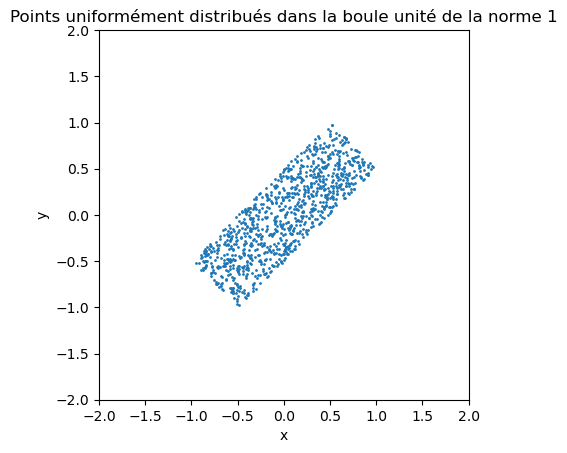

In [3]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

cov = np.array([[1.0, 0.5],[0.5, 1.0]]) 

p = 1

y_train, y_test, y_calibration = generate_uniform_points_in_p_norm_ball(n_train, p), generate_uniform_points_in_p_norm_ball(n_test, p), generate_uniform_points_in_p_norm_ball(n_calibration, p)

y_train = y_train @ cov
y_test = y_train
y_calibration = y_train


# Affichage des points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Points uniformément distribués dans la boule unité de la norme {p}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
seed_everything(42)

k = 2
d = 2

q = 2

alpha = 0.05


ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha)
ellipsoid_predictor.conformalize(y_calibration, alpha)

DC_method = DC()
DC_method.fit(y_train, alpha, q)
DC_method.conformalize(y_calibration, alpha)


print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())
print("DC_method volume : ", DC_method.get_volume())

Network with  1 hidden layers and a hidden dimension of  128


/opt/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


ellipsoid_predictor volume :  1.5288401338296516
DC_method volume :  1.6422228445265112


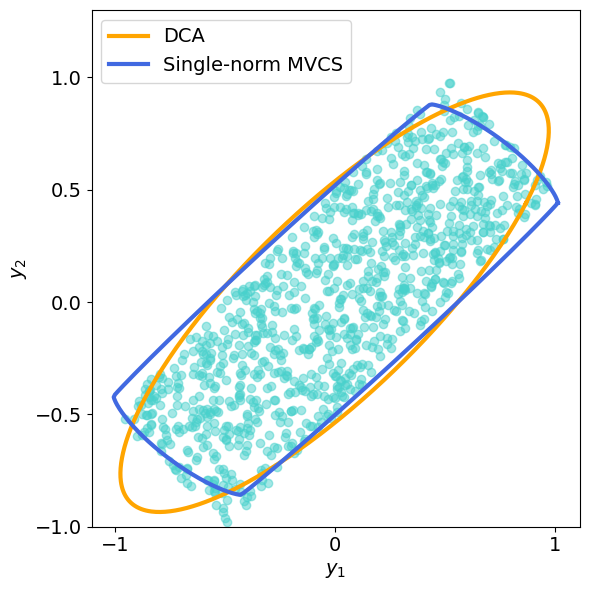

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)
ax = add_ellipse(ax, DC_method.mu, DC_method.Lambda, DC_method.q, DC_method.nu, color = "orange",  label = f"DCA")
ax = add_ellipse(ax, ellipsoid_predictor.mu, ellipsoid_predictor.Lambda, ellipsoid_predictor.q, ellipsoid_predictor.nu, color = "royalblue", label = f"Single-norm MVCS")

ax.legend(fontsize=14, loc='upper left')
ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([-1, 0, 1])
ax.set_ylim(-1, 1.3)
fig.tight_layout() 

plt.savefig(f"../figs/2.2.1uniformal_generalize_malahanobis_torch_coverage{1-alpha}_p={ellipsoid_predictor.q:.2f}.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
plt.close()

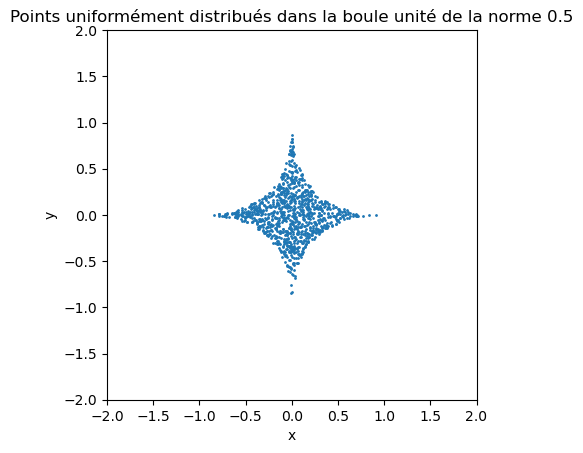

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

p = 0.5

y_train, y_test, y_calibration = generate_uniform_points_in_p_norm_ball(n_train, p), generate_uniform_points_in_p_norm_ball(n_test, p), generate_uniform_points_in_p_norm_ball(n_calibration, p)

y_train = y_train 
y_test = y_train
y_calibration = y_train


# Plot the points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Points uniformément distribués dans la boule unité de la norme {p}')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
seed_everything(1)

k = 2
d = 2

alpha = 0.1

ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha)
ellipsoid_predictor.conformalize(y_calibration, alpha)

print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())

Network with  1 hidden layers and a hidden dimension of  128


/opt/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


ellipsoid_predictor volume :  0.5812234723778583
DC_method volume :  0.7025813641977093


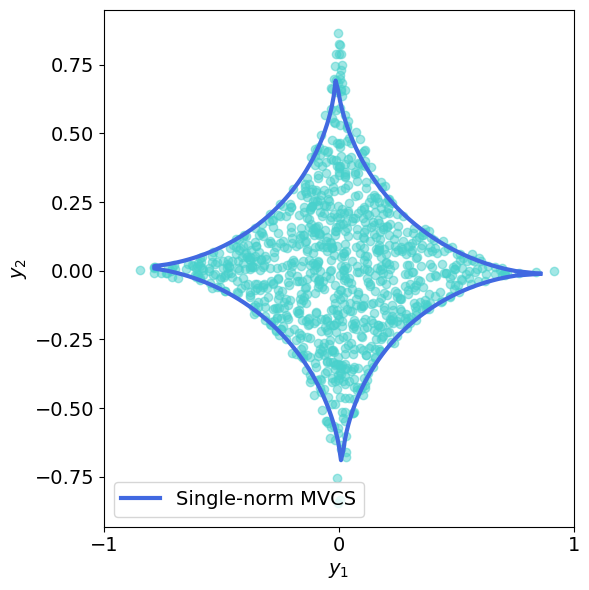

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)
ax = add_ellipse(ax, ellipsoid_predictor.mu, ellipsoid_predictor.Lambda, ellipsoid_predictor.q, ellipsoid_predictor.nu, color = "royalblue", label = f"Single-norm MVCS")

# ax.grid(True)
# ax.legend().remove()
ax.legend(fontsize=14)
ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([-1, 0, 1])
fig.tight_layout() 

plt.savefig(f"../figs/2.2.2norm_05_coverage{1-alpha}_p={ellipsoid_predictor.q:.2f}.pdf", dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
plt.close()



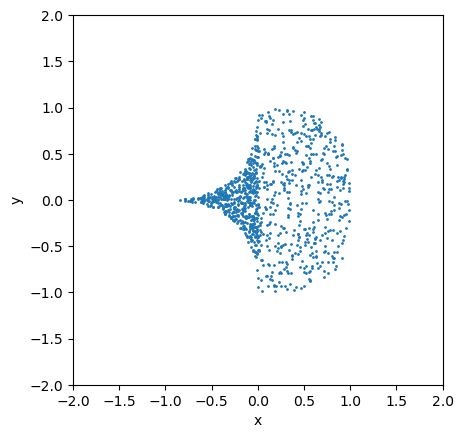

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

p_left = 0.5
y_train_left, y_test_left, y_calibration_left = generate_uniform_points_in_p_norm_ball(n_train, p_left), generate_uniform_points_in_p_norm_ball(n_test, p_left), generate_uniform_points_in_p_norm_ball(n_calibration, p_left)

p_right = 3
y_train_right, y_test_right, y_calibration_right = generate_uniform_points_in_p_norm_ball(n_train, p_right), generate_uniform_points_in_p_norm_ball(n_test, p_right), generate_uniform_points_in_p_norm_ball(n_calibration, p_right)

train_left_selected, test_left_selected, calibration_left_selected = y_train_left[y_train_left[:, 0] < 0], y_test_left[y_test_left[:, 0] < 0], y_calibration_left[y_calibration_left[:, 0] < 0]
train_right_selected, test_right_selected, calibration_right_selected = y_train_right[y_train_right[:, 0] >= 0], y_test_right[y_test_right[:, 0] >= 0], y_calibration_right[y_calibration_right[:, 0] >= 0]

p_top_right = 1
y_train_top_right, y_test_top_right, y_calibration_top_right = generate_uniform_points_in_p_norm_ball(n_train, p_top_right), generate_uniform_points_in_p_norm_ball(n_test, p_top_right), generate_uniform_points_in_p_norm_ball(n_calibration, p_top_right)


y_train = np.vstack((train_left_selected, train_right_selected))
y_test = np.vstack((test_left_selected, test_right_selected))
y_calibration = np.vstack((calibration_left_selected, calibration_right_selected))

y_test = y_train
y_calibration = y_train


# Affichage des points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [ ]:
seed_everything(1)

q = 1.5

k = 2
d = 2

q = 1.01

hidden_dim = 5
hidden_dim_matrix = 100

batch_size = 1_000

alpha = 0.1


n_splits = 2

half_ellipsoid_predictor = HalfEllipsoidPredictor(n_splits)
half_ellipsoid_predictor.fit(y_train, alpha, verbose=0)
half_ellipsoid_predictor.conformalize_ellipsoids(y_calibration, alpha)

ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha)
ellipsoid_predictor.conformalize(y_calibration, alpha)

print("half_ellipsoid_predictor volume : ", half_ellipsoid_predictor.get_volume())
print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())

Network with  1 hidden layers and a hidden dimension of  5


/Users/sbraun/Desktop/Inria/MVCS/one_matrix/code/half_ellipsoid_predictor.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  points = torch.tensor(points, dtype=torch.float32)  # Ensure points are float tensors


Network with  1 hidden layers and a hidden dimension of  128
half_ellipsoid_predictor volume :  1.7901045898097545
ellipsoid_predictor volume :  2.201337639979098


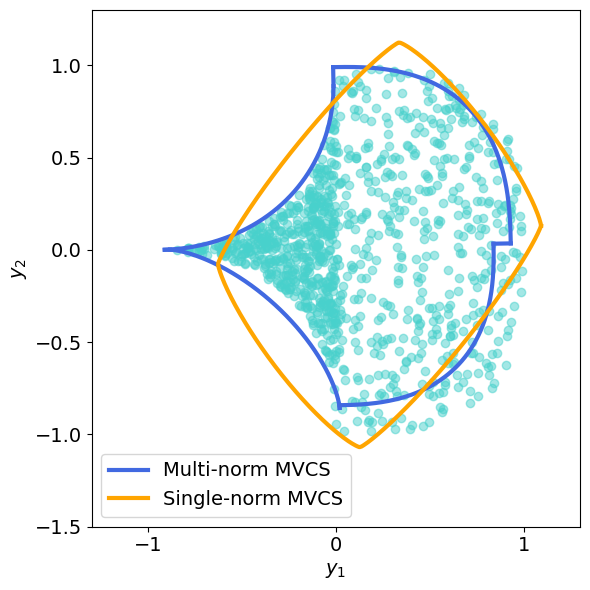

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
# ax.scatter(*y_train.T, label='Test data', c='blue', alpha=0.5)
ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)

ax = add_ellipse_multiple_lambdas(ax, 
                              half_ellipsoid_predictor.mu, 
                              half_ellipsoid_predictor.rotationMatrix, 
                              half_ellipsoid_predictor.tab_diag,
                              half_ellipsoid_predictor.tab_q, 
                              half_ellipsoid_predictor.split, 
                              half_ellipsoid_predictor.nu, color = "royalblue", label='Multi-norm MVCS')
ax = add_ellipse(ax, ellipsoid_predictor.mu, ellipsoid_predictor.Lambda, ellipsoid_predictor.q, ellipsoid_predictor.nu, color = "orange", label = f"Single-norm MVCS")

# ax.grid(True)
# ax.legend().remove()
ax.legend(fontsize=14)

ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([-1, 0, 1])
ax.set_ylim(-1.5, 1.3)
ax.set_xlim(-1.3, 1.3)
fig.tight_layout() 

plt.savefig(f"../figs/2.2.3combinaison_half_torch_first_plot_coverage_{1-alpha}_p={ellipsoid_predictor.q:.2f}_tab_q_{half_ellipsoid_predictor.tab_q}.pdf", dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
plt.close()



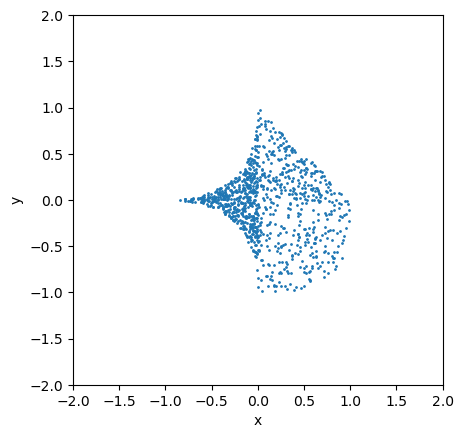

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

p_left = 0.5
y_train_left, y_test_left, y_calibration_left = generate_uniform_points_in_p_norm_ball(n_train, p_left), generate_uniform_points_in_p_norm_ball(n_test, p_left), generate_uniform_points_in_p_norm_ball(n_calibration, p_left)

p_right = 3
y_train_right, y_test_right, y_calibration_right = generate_uniform_points_in_p_norm_ball(n_train, p_right), generate_uniform_points_in_p_norm_ball(n_test, p_right), generate_uniform_points_in_p_norm_ball(n_calibration, p_right)

p_top_right = 1
y_train_top_right, y_test_top_right, y_calibration_top_right = generate_uniform_points_in_p_norm_ball(n_train, p_top_right), generate_uniform_points_in_p_norm_ball(n_test, p_top_right), generate_uniform_points_in_p_norm_ball(n_calibration, p_top_right)

train_right_selected = y_train_right[(y_train_right[:, 0] > 0) & (y_train_right[:, 1] < 0)]
test_right_selected = y_test_right[(y_test_right[:, 0] > 0) & (y_test_right[:, 1] < 0)]
calibration_right_selected = y_calibration_right[(y_calibration_right[:, 0] > 0) & (y_calibration_right[:, 1] < 0)]

train_top_right_selected = y_train_top_right[(y_train_top_right[:, 0] >= 0) & (y_train_top_right[:, 1] > 0)]
test_top_right_selected = y_test_top_right[(y_test_top_right[:, 0] >= 0) & (y_test_top_right[:, 1] > 0)]
calibration_top_right_selected = y_calibration_top_right[(y_calibration_top_right[:, 0] >= 0) & (y_calibration_top_right[:, 1] > 0)]
                                                         
y_train = np.vstack((train_left_selected, train_right_selected, train_top_right_selected))
y_test = np.vstack((test_left_selected, test_right_selected, test_top_right_selected))
y_calibration = np.vstack((calibration_left_selected, calibration_right_selected, calibration_top_right_selected))


# Affichage des points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



In [ ]:
seed_everything(1)

k = 2
d = 2

alpha = 0.01

n_splits = 2

half_ellipsoid_predictor = HalfEllipsoidPredictor(n_splits)
half_ellipsoid_predictor.fit(y_train, alpha, verbose=0)
half_ellipsoid_predictor.conformalize_ellipsoids(y_calibration, alpha)

print("half_ellipsoid_predictor volume : ", half_ellipsoid_predictor.get_volume())

Network with  1 hidden layers and a hidden dimension of  5


/Users/sbraun/Desktop/Inria/MVCS/one_matrix/code/half_ellipsoid_predictor.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  points = torch.tensor(points, dtype=torch.float32)  # Ensure points are float tensors


Network with  1 hidden layers and a hidden dimension of  128


/opt/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


half_ellipsoid_predictor volume :  1.7655262945510901
ellipsoid_predictor volume :  2.2307692187878665
DC_method volume :  2.3596217901639154
convex_relaxation volume :  2.2992643306301908
empirical_covariance volume :  2.9031037687184393


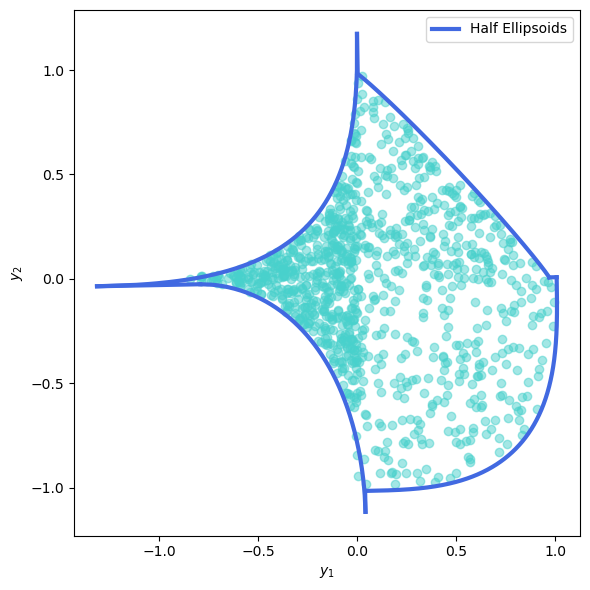

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)

ax = add_ellipse_multiple_lambdas(ax, 
                              half_ellipsoid_predictor.mu, 
                              half_ellipsoid_predictor.rotationMatrix, 
                              half_ellipsoid_predictor.tab_diag,
                              half_ellipsoid_predictor.tab_q, 
                              half_ellipsoid_predictor.split, 
                              half_ellipsoid_predictor.nu, color = "royalblue", label='Half Ellipsoids')


ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$')
fig.tight_layout() 

plt.savefig(f"../figs/combinaison_half_second_plot_coverage{1-alpha}.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
plt.close()

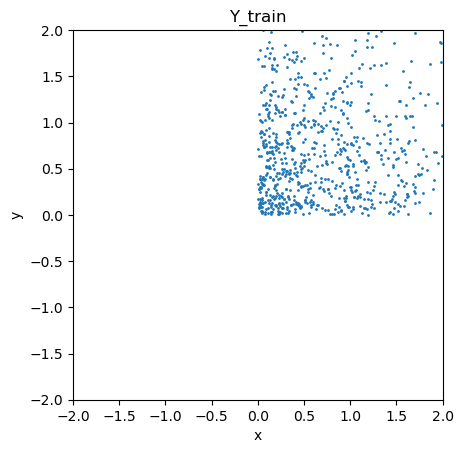

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 2
d = 2
pert = "exponential"
covariance_matrix = np.array([[1., 0.9], [0.9, 1.]])
data_generator = dataGenerator(d, k, pert, covariance_matrix = covariance_matrix)
y_train, y_test, y_calibration = data_generator.generate_perturbation_train_calibration_test(n_train, n_test, n_calibration)
y_test = y_train
y_calibration = y_train

# Plot the points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Y_train')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
seed_everything(35)

k = 2
d = 2

alpha = 0.1

n_splits = 1

half_ellipsoid_predictor = HalfEllipsoidPredictor(n_splits)
half_ellipsoid_predictor.fit(y_train, alpha, verbose=1, num_epochs_our_loss=1000, lr_q=0.01, lr_matrix_model=0.01, lr_model=0.01)
half_ellipsoid_predictor.conformalize_ellipsoids(y_calibration, alpha)

Network with  1 hidden layers and a hidden dimension of  5
Epoch 0: Loss = 3.0065786838531494 - Stop Loss : 2.957332134246826 - Best stop loss = 2.957332134246826


/Users/sbraun/Desktop/Inria/MVCS/one_matrix/code/half_ellipsoid_predictor.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  points = torch.tensor(points, dtype=torch.float32)  # Ensure points are float tensors


Epoch 100: Loss = 2.2846908569335938 - Stop Loss : 2.283602714538574 - Best stop loss = 2.2783451080322266
Epoch 200: Loss = 2.2215566635131836 - Stop Loss : 2.2253642082214355 - Best stop loss = 2.2054688930511475
Epoch 300: Loss = 2.184124708175659 - Stop Loss : 2.1873245239257812 - Best stop loss = 2.1749491691589355
Epoch 400: Loss = 2.171771287918091 - Stop Loss : 2.1849186420440674 - Best stop loss = 2.1679067611694336
Epoch 500: Loss = 2.190484046936035 - Stop Loss : 2.1890313625335693 - Best stop loss = 2.167067289352417
Epoch 600: Loss = 2.1725194454193115 - Stop Loss : 2.1714372634887695 - Best stop loss = 2.1651387214660645
Epoch 700: Loss = 2.1670069694519043 - Stop Loss : 2.170598268508911 - Best stop loss = 2.1617698669433594
Epoch 800: Loss = 2.1641945838928223 - Stop Loss : 2.1629319190979004 - Best stop loss = 2.16149640083313
Epoch 900: Loss = 2.1705691814422607 - Stop Loss : 2.1692676544189453 - Best stop loss = 2.16149640083313
Last epoch 999: Loss = 2.1670179367065

0.7765164375305176

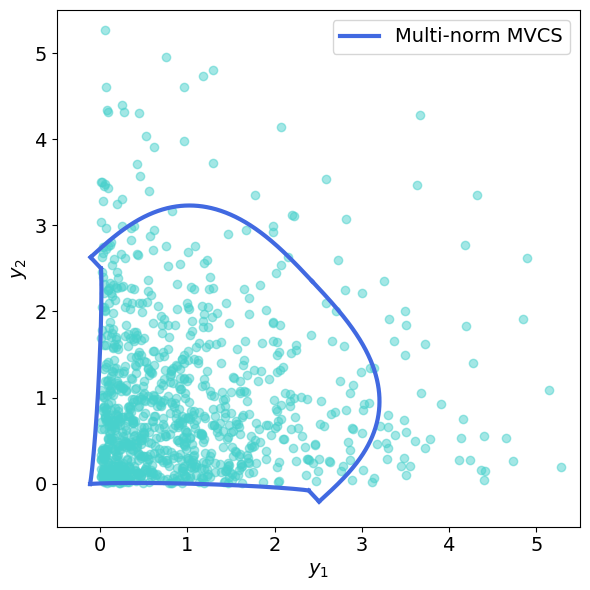

[0.9568653106689453, 2.9013354778289795]


In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)

ax = add_ellipse_multiple_lambdas(ax, 
                              half_ellipsoid_predictor.mu, 
                              half_ellipsoid_predictor.rotationMatrix, 
                              half_ellipsoid_predictor.tab_diag,
                              half_ellipsoid_predictor.tab_q, 
                              half_ellipsoid_predictor.split, 
                              half_ellipsoid_predictor.nu, color = "royalblue", label='Multi-norm MVCS')

ax.legend(fontsize=14)
ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(-0.5, 5.5)
fig.tight_layout() 

plt.savefig(f"../figs/2.2.4combinaison_half_second_plot_coverage{1-alpha}_tab_q{half_ellipsoid_predictor.tab_q}.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
plt.close()

print(half_ellipsoid_predictor.tab_q)

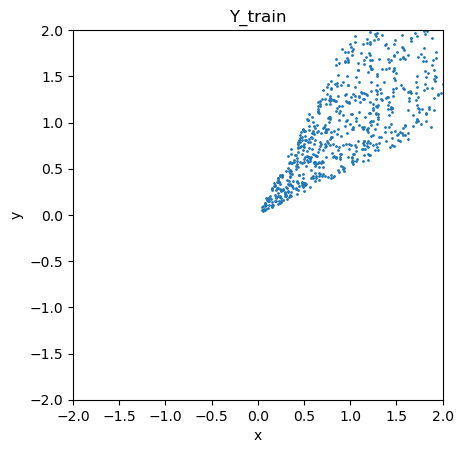

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 2
d = 2
pert = "exponential"
covariance_matrix = np.array([[1., 0.5], [0.5, 1.]])
data_generator = dataGenerator(d, k, pert, covariance_matrix = covariance_matrix)
y_train, y_test, y_calibration = data_generator.generate_perturbation_train_calibration_test(n_train, n_test, n_calibration)
y_train = y_train @ covariance_matrix

y_test = y_train
y_calibration = y_train


# Plot the points
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Y_train')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [20]:
seed_everything(1)

alpha = 0.1

ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha)
ellipsoid_predictor.conformalize(y_calibration, alpha)

print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())

Network with  1 hidden layers and a hidden dimension of  128
ellipsoid_predictor volume :  7.968592970621462
